In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = '../data/immu/all.csv'
data = pd.read_csv(path, delimiter=',')

print("In total there are", len(data), "questions.")
data = data[data['Figure'].isnull()]

print("In total there are", len(data), "questions (no figure).")


In total there are 843 questions.
In total there are 815 questions (no figure).


In [4]:
print("\n -----All Questions----- \n")
print("Number of questions with only p-values available", data['distractor1_rate'].isna().sum(), "(", round(data['distractor1_rate'].isna().sum() / len(data) * 100, 2), "%)")
two_choice_questions = data[~data['Answer_B'].isna() & data['Answer_C'].isna() & data['Answer_D'].isna()]
three_choice_questions = data[~data['Answer_B'].isna() & ~data['Answer_C'].isna() & data['Answer_D'].isna()]
four_choice_questions = data[~data['Answer_B'].isna() & ~data['Answer_C'].isna() & ~data['Answer_D'].isna()]

print("Number of two-choice questions:", len(two_choice_questions), "(", round(len(two_choice_questions) / len(data) * 100, 2), "%)")
print("Number of three-choice questions:", len(three_choice_questions), "(", round(len(three_choice_questions) / len(data) * 100, 2), "%)")
print("Number of four-choice questions:", len(four_choice_questions), "(", round(len(four_choice_questions) / len(data) * 100, 2), "%)")
print("total:", len(two_choice_questions) + len(three_choice_questions) + len(four_choice_questions), "(", round((len(two_choice_questions) + len(three_choice_questions) + len(four_choice_questions)) / len(data) * 100, 2), "%)")


print("\n -----Questions with Selection Rates----- \n")
two_choice_questions = data[~data['distractor1_rate'].isna() & data['distractor2_rate'].isna() & data['distractor3_rate'].isna()]
three_choice_questions = data[~data['distractor1_rate'].isna() & ~data['distractor2_rate'].isna() & data['distractor3_rate'].isna()]
four_choice_questions = data[~data['distractor1_rate'].isna() & ~data['distractor2_rate'].isna() & ~data['distractor3_rate'].isna()]

print("Number of two-choice questions:", len(two_choice_questions), "(", round(len(two_choice_questions) / len(data) * 100, 2), "%)")
print("Number of three-choice questions:", len(three_choice_questions), "(", round(len(three_choice_questions) / len(data) * 100, 2), "%)")
print("Number of four-choice questions:", len(four_choice_questions), "(", round(len(four_choice_questions) / len(data) * 100, 2), "%)")

print("total:", len(two_choice_questions) + len(three_choice_questions) + len(four_choice_questions), "(", round((len(two_choice_questions) + len(three_choice_questions) + len(four_choice_questions)) / len(data) * 100, 2), "%)")



 -----All Questions----- 

Number of questions with only p-values available 226 ( 27.73 %)
Number of two-choice questions: 33 ( 4.05 %)
Number of three-choice questions: 168 ( 20.61 %)
Number of four-choice questions: 614 ( 75.34 %)
total: 815 ( 100.0 %)

 -----Questions with Selection Rates----- 

Number of two-choice questions: 22 ( 2.7 %)
Number of three-choice questions: 134 ( 16.44 %)
Number of four-choice questions: 432 ( 53.01 %)
total: 588 ( 72.15 %)


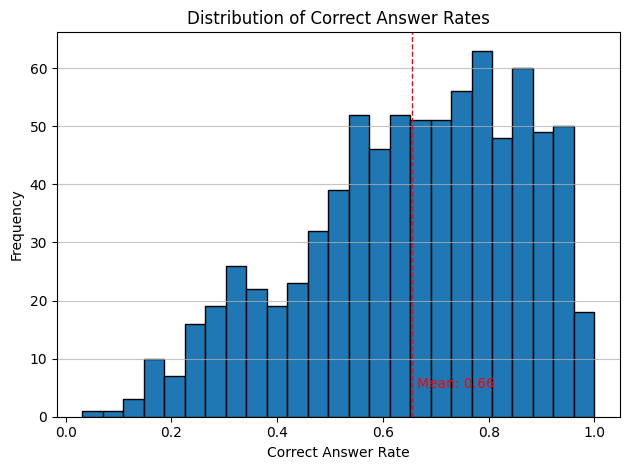

In [5]:
# Histogram of correct_answer_rate
plt.hist(data['correct_answer_rate'], bins=25, edgecolor='black')
plt.title('Distribution of Correct Answer Rates')
plt.xlabel('Correct Answer Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

mean_correct_rate = data['correct_answer_rate'].mean()
plt.axvline(mean_correct_rate, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_correct_rate + 0.01, 5, f'Mean: {mean_correct_rate:.2f}', color='red')
plt.tight_layout()

plt.show()

In [6]:
# Selection Rate per option: 
selection_rates = {
    'correct_answer_rate': data['correct_answer_rate'].mean(),
    'distractor1_rate': data['distractor1_rate'].mean(),
    'distractor2_rate': data['distractor2_rate'].mean(),
    'distractor3_rate': data['distractor3_rate'].mean()
}

print("\nSelection rates for each option:")
for option, rate in selection_rates.items():
    print(f"{option}: {rate:.2f}")


Selection rates for each option:
correct_answer_rate: 0.66
distractor1_rate: 0.21
distractor2_rate: 0.09
distractor3_rate: 0.05


In [7]:
# questions without figure, but with (at least) distractor 1
usable_questions = data[~data['distractor1_rate'].isna()]
print("Count of questions with 'has_content_distractors'== 0", len(usable_questions[usable_questions['has_content_distractors'] == 0]), "(", round(len(usable_questions[usable_questions['has_content_distractors'] == 0]) / len(usable_questions) * 100, 2), "%)")
print("Count of questions with 'has_content_distractors'== 1", len(usable_questions[usable_questions['has_content_distractors'] == 1]), "(", round(len(usable_questions[usable_questions['has_content_distractors'] == 1]) / len(usable_questions) * 100, 2), "%)")
print("Count of questions with 'has_content_distractors'== 2", len(usable_questions[usable_questions['has_content_distractors'] == 2]), "(", round(len(usable_questions[usable_questions['has_content_distractors'] == 2]) / len(usable_questions) * 100, 2), "%)")

# table with mean correct_answer_rate, distractor1_rate, distractor2_rate, distractor3_rate, RIT for each has_content_distractors value
mean_rates = usable_questions.groupby('has_content_distractors').agg({
    'correct_answer_rate': 'mean',
    'distractor1_rate': 'mean',
    'distractor2_rate': 'mean',
    'distractor3_rate': 'mean',
}).reset_index()
mean_rates.columns = ['has_content_distractors', 'mean_correct_answer_rate', 'mean_distractor1_rate', 'mean_distractor2_rate', 'mean_distractor3_rate']

print("\nMean rates for each has_content_distractors value:")
print(mean_rates)

Count of questions with 'has_content_distractors'== 0 82 ( 13.92 %)
Count of questions with 'has_content_distractors'== 1 89 ( 15.11 %)
Count of questions with 'has_content_distractors'== 2 418 ( 70.97 %)

Mean rates for each has_content_distractors value:
   has_content_distractors  mean_correct_answer_rate  mean_distractor1_rate  \
0                        0                  0.623378               0.269000   
1                        1                  0.636764               0.224326   
2                        2                  0.673536               0.197629   

   mean_distractor2_rate  mean_distractor3_rate  
0               0.104200               0.050444  
1               0.101966               0.055643  
2               0.091544               0.044163  
